<h1> Heart Disease Data Analysis </h1> <br>
Data was sourced from kaggle:<a> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction</a>
<br> 
The goal of the analysis is:<br>
1. investigate the dataset and it's limitations,<br>
2. clean the dataset for any missing values that are out of normal physiological range, <br>
3. analyze for any correlations or trends in the attributes (age, blood pressure, cholesterol etc.) vs the target variable (patients with heart disease)

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4)

In [4]:
heart = pd.read_csv('heart.csv')

In [5]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h4>Attribute Information</h4><br>
Age:   age of the patient [years] <br>
Sex: sex of the patient [M: Male, F: Female]<br>
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak: oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease: output class [1: heart disease, 0: Normal] <br>


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h2> Data Cleaning </h2> 
<br> 
Checking each numeric column to see if values fall in normal physiological ranges:   

In [7]:
for col in heart.columns: 
    if heart[col].dtype == 'int64' or heart[col].dtype == 'int64':
        print(f'{col}:\tMIN:{heart[col].min()}\tMAX:{heart[col].max()}')       

Age:	MIN:28	MAX:77
RestingBP:	MIN:0	MAX:200
Cholesterol:	MIN:0	MAX:603
FastingBS:	MIN:0	MAX:1
MaxHR:	MIN:60	MAX:202
HeartDisease:	MIN:0	MAX:1


Resting BP and Cholesterol should never be 0... how many records have BP or cholesterol of 0? 

In [8]:
print(heart['RestingBP'].value_counts()[0])
print(heart['Cholesterol'].value_counts()[0])

1
172


In [9]:
heart[heart['Cholesterol']>0]['Cholesterol'].sort_values(ascending=True)
# Next lowest cholesterol value is 85 

98      85
78     100
444    100
571    110
541    113
      ... 
250    491
30     518
76     529
616    564
149    603
Name: Cholesterol, Length: 746, dtype: int64

In [10]:
heart['RestingBP'].sort_values(ascending=True)
# Next lowest BP measure is 80 

449      0
314     80
227     92
692     94
832     94
      ... 
759    192
399    200
732    200
241    200
365    200
Name: RestingBP, Length: 918, dtype: int64

Dropping all rows where BP is 0 or Cholesterol is 0: 

In [11]:
hf = heart[(heart['Cholesterol']>0) & (heart['RestingBP']>0)]

<h2> Exploratory Data Analysis </h2> 

Text(0.5, 1.0, 'Gender Distribution')

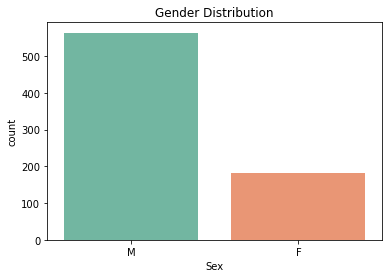

In [53]:
sns.countplot(x='Sex',data=hf, palette='Set2')
plt.title('Gender Distribution')

Majority of dataset is males! 

<AxesSubplot:ylabel='HeartDisease'>

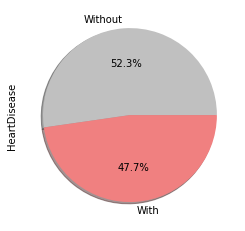

In [37]:
hf['HeartDisease'].value_counts().plot.pie(autopct="%1.1f%%", colors=['silver', 'lightcoral'], shadow=True, labels=['Without','With'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

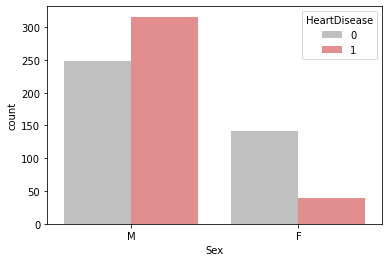

In [77]:
sns.countplot(x='Sex',data=hf, hue='HeartDisease', palette=['silver', 'lightcoral'])

In [47]:
hf.groupby('Sex')['HeartDisease'].value_counts(normalize=True,sort=False).reset_index(name='Percentage')

,Sex,HeartDisease,Percentage
0,F,0,0.780220
1,F,1,0.219780
2,M,0,0.439716
3,M,1,0.560284


Data is almost 50/50 patients with heart disease and those without. While only 22% of female patients have heart disease, 56% of male patients have heart disease. Heart disease is more common in males than in females. 
<br> <br>
Distributions for numeric data: 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

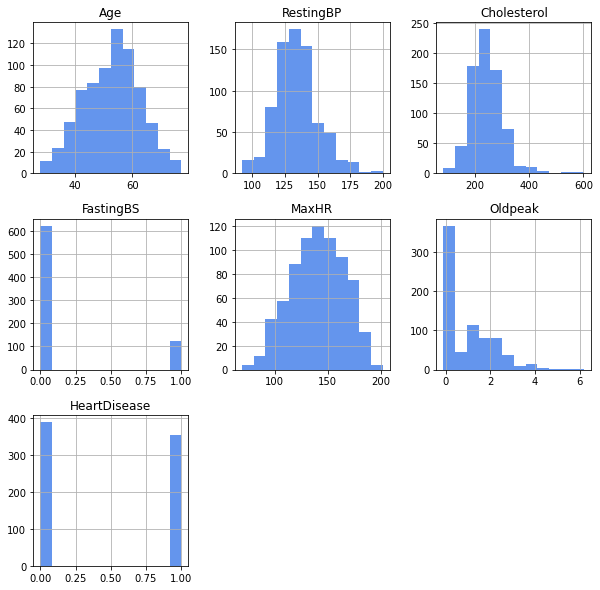

In [173]:
hf.hist(figsize = (10, 10),color='cornflowerblue', bins=12)

Notes on distribution plots: 
1. Only a small percent of patients in dataset have high fasting blood sugar (>120mg/dl notated as 1 in dataset is indicative of pre-diabetes or diabetes)
2. The majority of patient's max heart rate is quite high (>100 beats per minute is indicative of tachycardia)
<br><br>
Distribution plots with target variable visualized: 

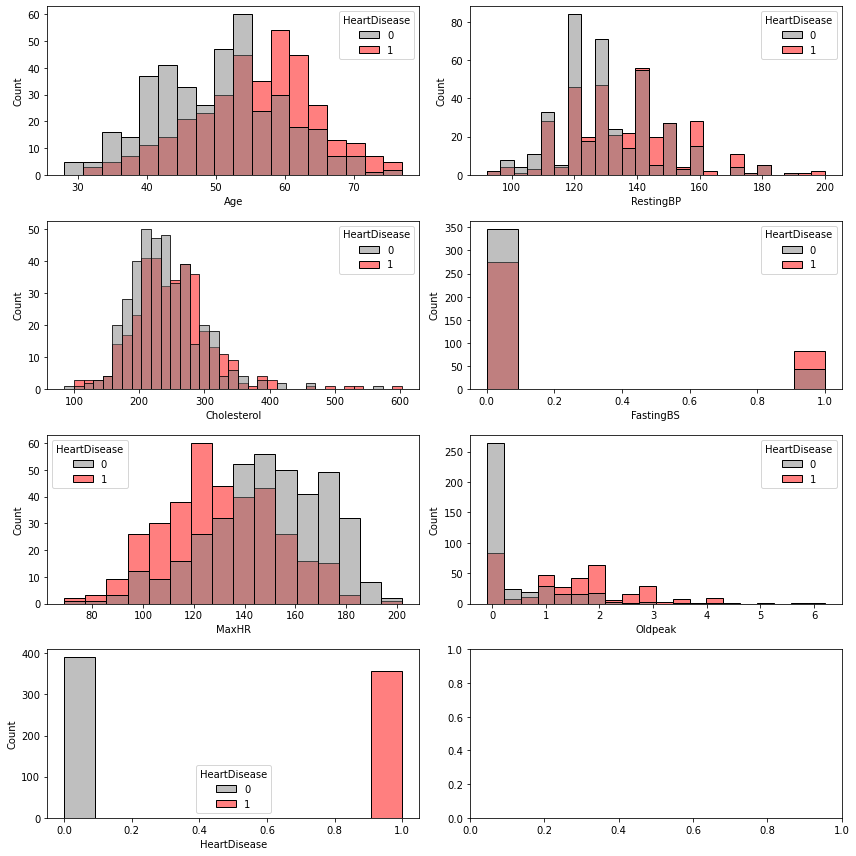

In [74]:
num_hf = hf.select_dtypes(include=['int64','float64'])  # selects for numeric columns only 
fig,axes = plt.subplots(4,2, figsize=(12,12))
for i, subplots in zip(num_hf, axes.flatten()):
    sns.histplot(data=hf, x=num_hf[i], ax=subplots, hue='HeartDisease', palette=['grey','red'])

plt.tight_layout()

As patients age increases, heart disease appears to become more common. Heart disease also appears more frequently in those with a high Oldpeak value and slightly more frequently in those with higher blood pressure and fasting blood sugar.<br> Interestingly, heart disease seems more likely in patients with a <i>low</i>, rather than a high max heart rate. 
<br><br> 
Now, let's explore the categorical data:  

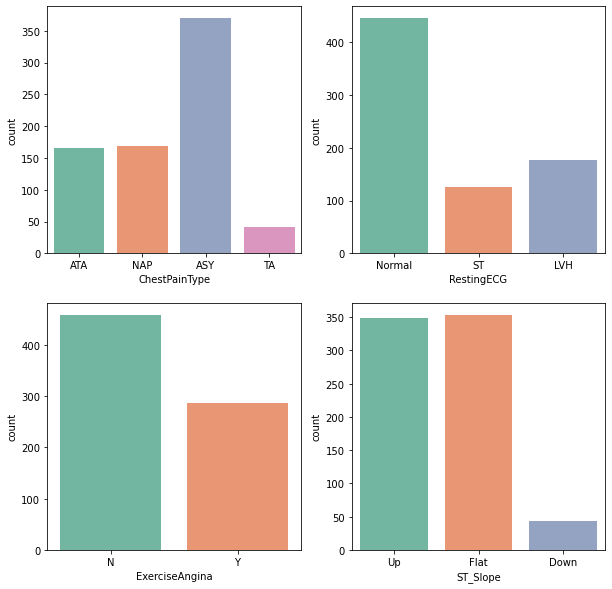

In [80]:
categorical_hf = hf[['ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
fig,axes=plt.subplots(2,2, figsize=(10,10))
for i, subplots in zip(categorical_hf, axes.flatten()):
    sns.countplot(x=categorical_hf[i], ax=subplots, palette='Set2')

Notes on categorical data counts: 
    1. Very few records of typical angina chest pain 
    2. Very few record of ST down slope on EKG 
   
Let's see how the categorical data splits between those with heart disease and those without...

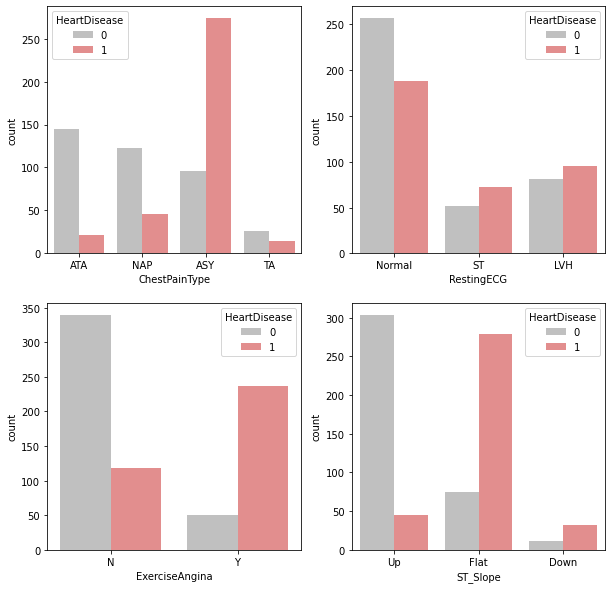

In [82]:
fig,axes=plt.subplots(2,2, figsize=(10,10))
for i, subplots in zip(categorical_hf, axes.flatten()):
    sns.countplot(x=categorical_hf[i], ax=subplots, palette=['silver', 'lightcoral'], hue=hf['HeartDisease'])

Most of the patients with heart disease do not experience typical angina chest pain (at rest?) but do experience exercise induced angina. The majority of those with heart disease have a flat ST slope on EKG, and a normal resting ECG. 
<br> <br>
Let's check directly for correlation between the attributes: 

<AxesSubplot:>

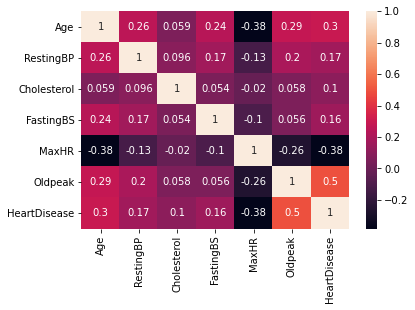

In [78]:
sns.heatmap(hf.corr(),annot=True)
# Correlation for numerical data only - default is Pearson correlation 

Oldpeak is the only numeric varibale with a significant correlation to heart disease. Let's expand the correlation analysis to include categorical attributes as well: 

In [86]:
hf_numeric = hf.copy()
for col in hf_numeric.columns: 
    if(hf_numeric[col].dtype =='object'):
        hf_numeric[col] = hf_numeric[col].astype('category').cat.codes
        
hf_numeric.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:>

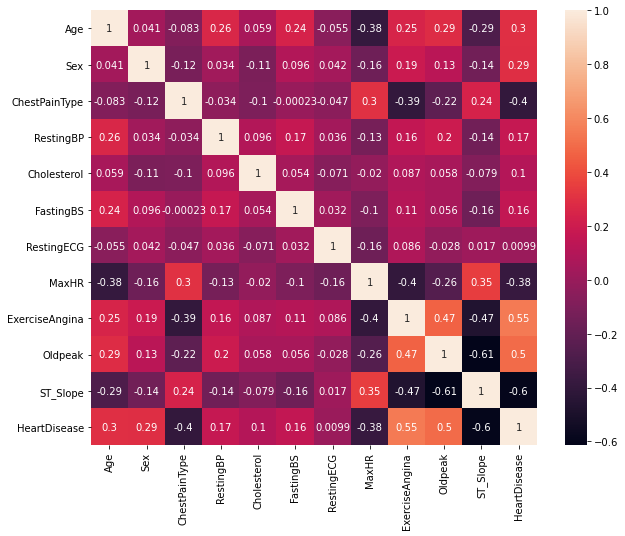

In [92]:
sns.heatmap(hf_numeric.corr(),annot=True)

Heart disease is most positively correlated with Excercise Angina and Old peak (ST depression induced by exercise relative to rest).<br> 
Heart disease is also correlated negatively with Max Heart Rate and ST slope. The ST slope relationship is better visualized in the bar graph above where majority of patients with heart disease either have a down or flat ST slope. 

Women tend to experience non-typical chest pain while men experience more typical chest pain... does this show in our results? 

In [98]:
chestpain =hf[hf['HeartDisease']==1].groupby('Sex')['ChestPainType'].value_counts(normalize=True,sort=False).reset_index(name='Percentage')
chestpain

,Sex,ChestPainType,Percentage
0,F,ASY,0.775000
1,F,ATA,0.100000
2,F,NAP,0.125000
3,M,ASY,0.768987
4,M,ATA,0.053797
5,M,NAP,0.129747
6,M,TA,0.047468


<AxesSubplot:xlabel='Sex', ylabel='Percentage'>

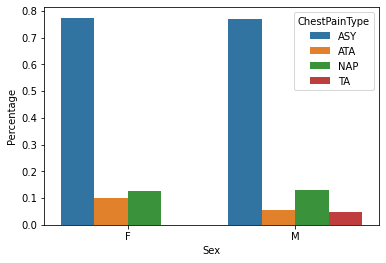

In [99]:
sns.barplot(data=chestpain, x='Sex',y='Percentage', hue='ChestPainType')

None of the female patients with heart disease experienced typical angina. Overall, the majority of those with heart disease male or female, was asymptomatic. 
<br><br>

<h3> Limitations/comments of dataset:</h3> 
1. Values that could have been numeric were measured as categorical such as the Fasting Blood sugar (either over a certain threshold or not). If numeric data was recorded for the fasting blood sugar in mg/dl it may have shown stronger relationships with other values. <br>
2. Data contains mostly male patients, and very few female patients with heart disease, which could skew results especially for females.  <br>
3. Sample size is very small compared to target population, and could lead to misleading results. For example, Resting BP and Max HR are usually correlated and do not show any relationship in this dataset.  <br>
4. A large amount of records were missing cholesterol values (172/918). <br>

<h3> Further analyses </h3> 
1. Instead of dropping records with missing cholesterol or BP values, instead substitute the values with the median for the dataset, or use another method to replace missing values, and see how/if this effects results. <br>
2. Suggested max heart rate for healthy adults is supposed to be 220 - Age. The max HR attribute could be categorized into those exceeding the suggested max heart rate based on their age and those falling under it and see if that categorical data has a higher correlation with heart disease and blood pressure, since the max HR itself may not be a good indicator. 
